In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import signal
from scipy.interpolate import CubicSpline
import mpl_axes_aligner 
import seaborn as sns
import csv

sns.set_theme(style="darkgrid")

%matplotlib widget

# data=pd.read_csv("not_moving_trot.csv")
# table=data[7500:]

#files are named gait-speed-period
filename="walking-1-0.5"
data=pd.read_csv(filename+".csv")
csv_file = filename+'_data.csv'

table=data[-20001:-1]
print(len(table.index))
table.reset_index(drop=True, inplace=True)

holder=[]
for i in range(len(table.index)):
    holder.append(table.qd00[i]*table.t00[i])
table.insert(len(table.columns), "p00", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd01[i]*table.t01[i])
table.insert(len(table.columns), "p01", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd02[i]*table.t02[i])
table.insert(len(table.columns), "p02", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd10[i]*table.t10[i])
table.insert(len(table.columns), "p10", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd11[i]*table.t11[i])
table.insert(len(table.columns), "p11", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd12[i]*table.t12[i])
table.insert(len(table.columns), "p12", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd20[i]*table.t20[i])
table.insert(len(table.columns), "p20", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd21[i]*table.t21[i])
table.insert(len(table.columns), "p21", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd22[i]*table.t22[i])
table.insert(len(table.columns), "p22", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd30[i]*table.t30[i])
table.insert(len(table.columns), "p30", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd31[i]*table.t31[i])
table.insert(len(table.columns), "p31", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd32[i]*table.t32[i])
table.insert(len(table.columns), "p32", holder, True)


20000


In [11]:
def calculate_areas(start,end):
    positive_area=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    negative_area=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    time=0.001
    columns=['p00','p01','p02','p10','p11','p12','p20','p21','p22','p30','p31','p32']
    for jj in range(len(columns)):
        for i in range(end-start):
            first_area=0.0
            second_area=0.0
            # print(table.p01[i+start],"  ",table.p01[i+start+1])
            if(table.loc[i+start,columns[jj]]>=0.0 and table.loc[i+start+1,columns[jj]]>=0.0):
                positive_area[jj]+=(table.loc[i+start,columns[jj]]+table.loc[i+start+1,columns[jj]])*time/2
            elif(table.loc[i+start,columns[jj]]<0.0 and table.loc[i+start+1,columns[jj]]<0.0):
                negative_area[jj]+=(table.loc[i+start,columns[jj]]+table.loc[i+start+1,columns[jj]])*time/2
            else:
                intersect=table.loc[i+start,columns[jj]]/(table.loc[i+start,columns[jj]]-table.loc[i+start+1,columns[jj]])*time
                first_area=table.loc[i+start,columns[jj]]*intersect/2
                second_area=table.loc[i+start+1,columns[jj]]*(time-intersect)/2
                if(first_area >=0.0):
                    positive_area[jj]+=first_area
                    negative_area[jj]+=second_area
                else:
                    positive_area[jj]+=second_area
                    negative_area[jj]+=first_area
    return positive_area,negative_area

def analyze_areas(start,end):
    min_power=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    max_power=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    start_window=[0,0,0,0,0,0,0,0,0,0,0,0]
    end_window=[0,0,0,0,0,0,0,0,0,0,0,0]
    max_neg_energy=[99999.9,99999.0,99999.0,99999.9,99999.0,99999.0,99999.9,99999.0,99999.0,99999.9,99999.0,99999.0]
    time=0.001
    columns=['p00','p01','p02','p10','p11','p12','p20','p21','p22','p30','p31','p32']
    for jj in range(len(columns)):
        temp_holder=0
        tmp_start=0
        tmp_end=0;
        for i in range(end-start):
            first_area=0.0
            second_area=0.0
            # print(table.p01[i+start],"  ",table.p01[i+start+1])
            if(table.loc[i+start,columns[jj]]>=0.0 and table.loc[i+start+1,columns[jj]]>=0.0):
                if( max_neg_energy[jj] > temp_holder):
                    max_neg_energy[jj]=temp_holder
                    start_window[jj]=tmp_start
                    end_window[jj]=tmp_end
                temp_holder=0
                tmp_start=i+start
            elif(table.loc[i+start,columns[jj]]<0.0 and table.loc[i+start+1,columns[jj]]<0.0):
                temp_holder+=(table.loc[i+start,columns[jj]]+table.loc[i+start+1,columns[jj]])*time/2
                tmp_end=i+start+1
            else:
                intersect=table.loc[i+start,columns[jj]]/(table.loc[i+start,columns[jj]]-table.loc[i+start+1,columns[jj]])*time
                first_area=table.loc[i+start,columns[jj]]*intersect/2
                second_area=table.loc[i+start+1,columns[jj]]*(time-intersect)/2
                if(first_area >=0.0):
                    if( max_neg_energy[jj] > temp_holder):
                        max_neg_energy[jj]=temp_holder
                        start_window[jj]=tmp_start
                        end_window[jj]=tmp_end
                    temp_holder=0
                    tmp_start=i+start
                    temp_holder+=second_area
                    tmp_end=i+start+1
                else:
                    temp_holder+=first_area
                    tmp_end=i+start+1
                    if( max_neg_energy[jj] > temp_holder):
                        max_neg_energy[jj]=temp_holder
                        start_window[jj]=tmp_start
                        end_window[jj]=tmp_end
                    temp_holder=0
                    tmp_start=i+start
        if( max_neg_energy[jj] > temp_holder):
            max_neg_energy[jj]=temp_holder
            start_window[jj]=tmp_start
            end_window[jj]=tmp_end
    return max_neg_energy,start_window,end_window

def analyze_range(graph,height_threshold,dist_threshold,start=0,end=20000):
    peaks, _ = find_peaks(table[graph], height=height_threshold,distance=dist_threshold)
    filtered_data=peaks[(peaks >= start) & (peaks <= end)]
    # print(filtered_data)
    # print(len(filtered_data))
    columns=['p00','p01','p02','p10','p11','p12','p20','p21','p22','p30','p31','p32']
    max_neg_energy=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    neg_energy=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    pos_energy=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    window=[0,0,0,0,0,0,0,0,0,0,0,0]
    for tmprng in range(len(filtered_data)-1):
        # print(tmprng)
        a,b=calculate_areas(filtered_data[tmprng],filtered_data[tmprng+1])
        c,d,e=analyze_areas(filtered_data[tmprng],filtered_data[tmprng+1])
        for ii in range(len(columns)):
            pos_energy[ii]+=a[ii]
            neg_energy[ii]+=b[ii]
            max_neg_energy[ii]+=c[ii]
            window[ii]+=(e[ii]-d[ii])
    # max_neg_energy/=len(filtered_data)
    # neg_energy/=len(filtered_data)
    # pos_energy/=len(filtered_data)
    for ii in range(len(columns)):
            pos_energy[ii]=pos_energy[ii]/(len(filtered_data)-1)
            neg_energy[ii]=neg_energy[ii]/(len(filtered_data)-1)
            max_neg_energy[ii]=max_neg_energy[ii]/(len(filtered_data)-1)
            window[ii]=window[ii]/(len(filtered_data)-1)
    print("pos_energy: "+str(pos_energy))
    print("neg_energy: "+str(neg_energy))
    print("avg max_neg_energy: "+str(max_neg_energy))
    print("window: "+str(window))
    
    a,b=calculate_areas(filtered_data[0],filtered_data[-1])
    c,d,e=analyze_areas(filtered_data[0],filtered_data[-1])
    f=[0,0,0,0,0,0,0,0,0,0,0,0]
    for ii in range(len(columns)):
        a[ii]=a[ii]/(len(filtered_data)-1)
        b[ii]=b[ii]/(len(filtered_data)-1)
        f[ii]=e[ii]-d[ii]
    print("avg pos_energy: "+str(a))
    print("avg neg_energy: "+str(b))
    print("max_neg_energy: "+str(c))
    print("avg window: "+str(f))
    with open(csv_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(columns)
        writer.writerow(a) #avg pos_energy
        writer.writerow(b) #avg neg_energy
        writer.writerow(max_neg_energy)  #avg max_neg_energy
        writer.writerow(f) #avg window
        writer.writerow(c) #max_neg_energy
        file.close()
    plt.close()
    plt.figure(figsize=(10,5))
    ax = plt.gca()
    plt.plot(table[graph])
    plt.plot(filtered_data, table[graph][filtered_data], 'ro')  # 'ro' stands for red dots at peak locations
    plt.title('Data with Peaks Above Threshold')
    plt.show()

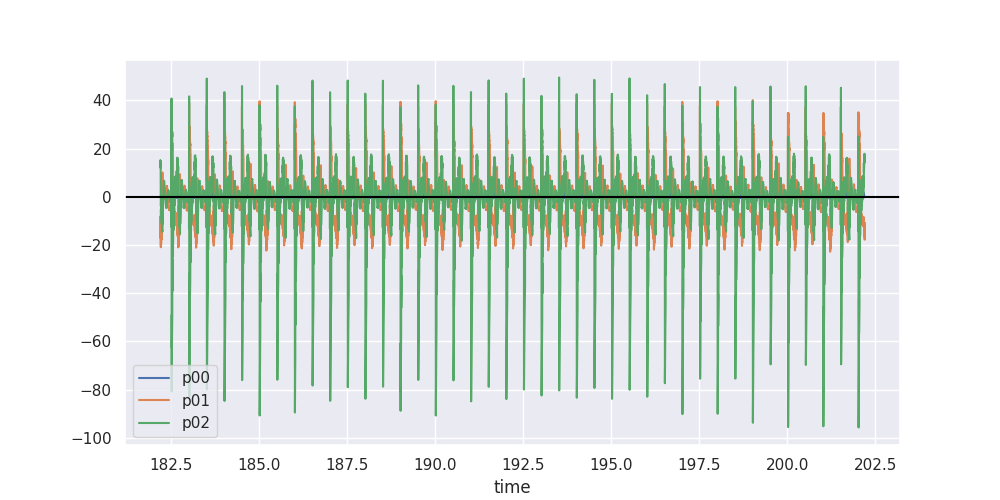

In [13]:
plt.close()
plt.figure(figsize=(10,5))
ax = plt.gca()

# table.plot( x = 'time' , y = 'q01', ax = ax )
table.plot( x = 'time' , y = 'p00', ax = ax )
table.plot( x = 'time' , y = 'p01', ax = ax )
table.plot( x = 'time' , y = 'p02', ax = ax )


# table.plot( x = 'time' , y = 'p02', ax = ax )
# table.plot( x = 'time' , y = 'qd00', ax = ax )
# table.plot( x = 'time' , y = 't00', ax = ax )
# table.plot( x = 'time' , y = 't01', ax = ax )

plt.axhline(y=0.0, color='black', linestyle='-')

plt.show()

pos_energy: [0.041533941506183156, 1.310119906807398, 1.1407331287782772, 0.08070565692912411, 0.7849829770397182, 2.9456312318937554, 0.12206983755226013, 2.885402182247236, 3.0803690319173316, 0.18214501660960633, 1.8323807871894433, 2.3729749232836426]
neg_energy: [-0.08593119991604116, -2.412463472783689, -3.1581990293419318, -0.07005957602990665, -1.8446938222266074, -0.9168160873176666, -0.03192841246877493, -0.4820399041075295, -3.4531543226686208, -0.10257846197664247, -0.6871216367467566, -1.543749113284809]
max_neg_energy: [-0.04180418890107975, -1.7619686364944562, -2.188138795631877, -0.032591680041766616, -1.2459785171600974, -0.6025133410966551, -0.019835160680401386, -0.38391096128790586, -2.8720052467744286, -0.03607365487750331, -0.24786763496990205, -0.5075745488438829]
window: [137.56410256410257, 160.76923076923077, 58.1025641025641, 9882.794871794871, 133.92307692307693, 35.53846153846154, 101.07692307692308, 86.56410256410257, 124.12820512820512, 101.2564102564102

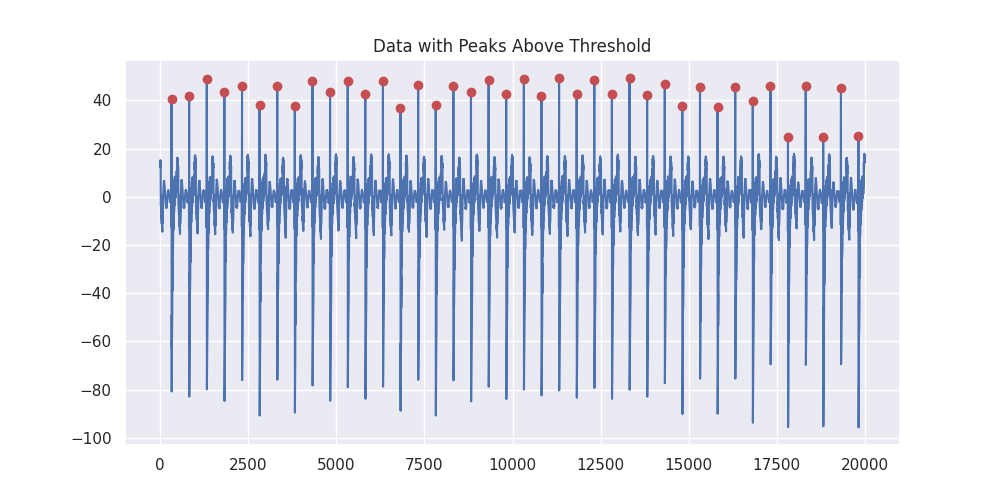

In [14]:
analyze_range('p02',-60,400)